In [251]:
# I will be using these packages over the course of the week
%matplotlib inline 
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.decomposition import TruncatedSVD # dimensionality reduction to pick out prominent features from sparse data. 

from geopandas import GeoSeries, GeoDataFrame;
from shapely.wkt import loads
import lightgbm # microsoft library for gradient boosted models useful for regression, classifications and other tasks

os.getcwd()


'/Users/markconrad/Documents/GeoHack Week/SocialMediaTrails/SocialMediaTrails/data'

In [252]:


shape_file = gpd.read_file('pud_results_hex.shp')




# Drop columns we don't need:
# Here we will drop the columns that do not serve in our specific analysis.
def remove_zeros(df):
    """" Here we will drop the records of zeroes that do not serve in our specific analysis.
    """
    pud = df[(df['PUD_YR_AVG']>0)]
    return pud

pud = shape_file[(shape_file['PUD_YR_AVG'] > 0)]
# I am having trouble performing numpy operations (such as the vectorized implementation of the log transformation) on 
# geodataframes so I converted into a pandas dataframe.




# I want to create a function that returns the log transformation for each column to try to assuage the skewedness of the data.
def log_normalize(pud, column):
    """This function uses a vectorized implementation log transformation on a pandas dataframe of the photos uploaded per day
    Parameters: 
    geodf = the dataframe to which we append a new column that includes the log transformation.
    df = column vector that matches the dimensions of the column that we are transforming.
    """
    
    df = np.log(pud[column])
    
    pud['log_normalize' + column] = df
    assert pud['log_normalize' + column].shape == df.shape
    return(pud['log_normalize' + column])


# plt.scatter(gdf_trails['FID'],log_normalize(gdf_trails,'PUD_JAN'))

pud.head()

,FID,PUD_YR_AVG,PUD_JAN,PUD_FEB,PUD_MAR,PUD_APR,PUD_MAY,PUD_JUN,PUD_JUL,PUD_AUG,PUD_SEP,PUD_OCT,PUD_NOV,PUD_DEC,geometry
8,8,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,"POLYGON ((448865.7747709445 5206334.984202031,..."
12,12,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((454865.7747709445 5206334.984202031,..."
16,16,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((460865.7747709445 5206334.984202031,..."
21,21,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,"POLYGON ((468365.7747709445 5206334.984202031,..."
22,22,1.1,0.2,0.0,0.0,0.1,0.0,0.2,0.1,0.2,0.1,0.0,0.2,0.0,"POLYGON ((469865.7747709445 5206334.984202031,..."


not quite a normal distribution...

/Users/markconrad/anaconda/envs/GIS/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


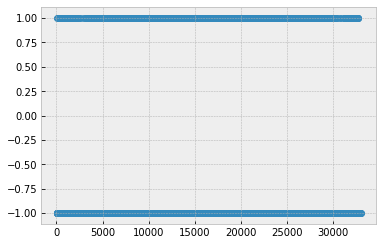

In [253]:
def z_score_normalize(geodf, column):
    """Here we are going to try another method to normalize the data, a common practice in statistics called computing the
    z-score.
    z-score = (sample - pop mean) / pop standard deviation"""
    
    geodf["zscore_" + column] = (np.array(geodf[column]) - np.average(geodf[column])) / np.sqrt(((np.average(geodf[column])  - np.array(geodf[column])))**2)
    assert geodf[column].shape == geodf["zscore_" + column].shape
    return geodf["zscore_" + column]

plt.scatter(pud['FID'],z_score_normalize(pud,'PUD_APR'))



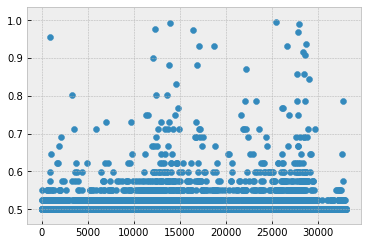

In [254]:
def sigmoid(df, column):
    return 1/(1+np.exp(-df[column]))
np_sig = sigmoid(pud, 'PUD_JAN')

plt.scatter(pud['FID'],(np_sig))



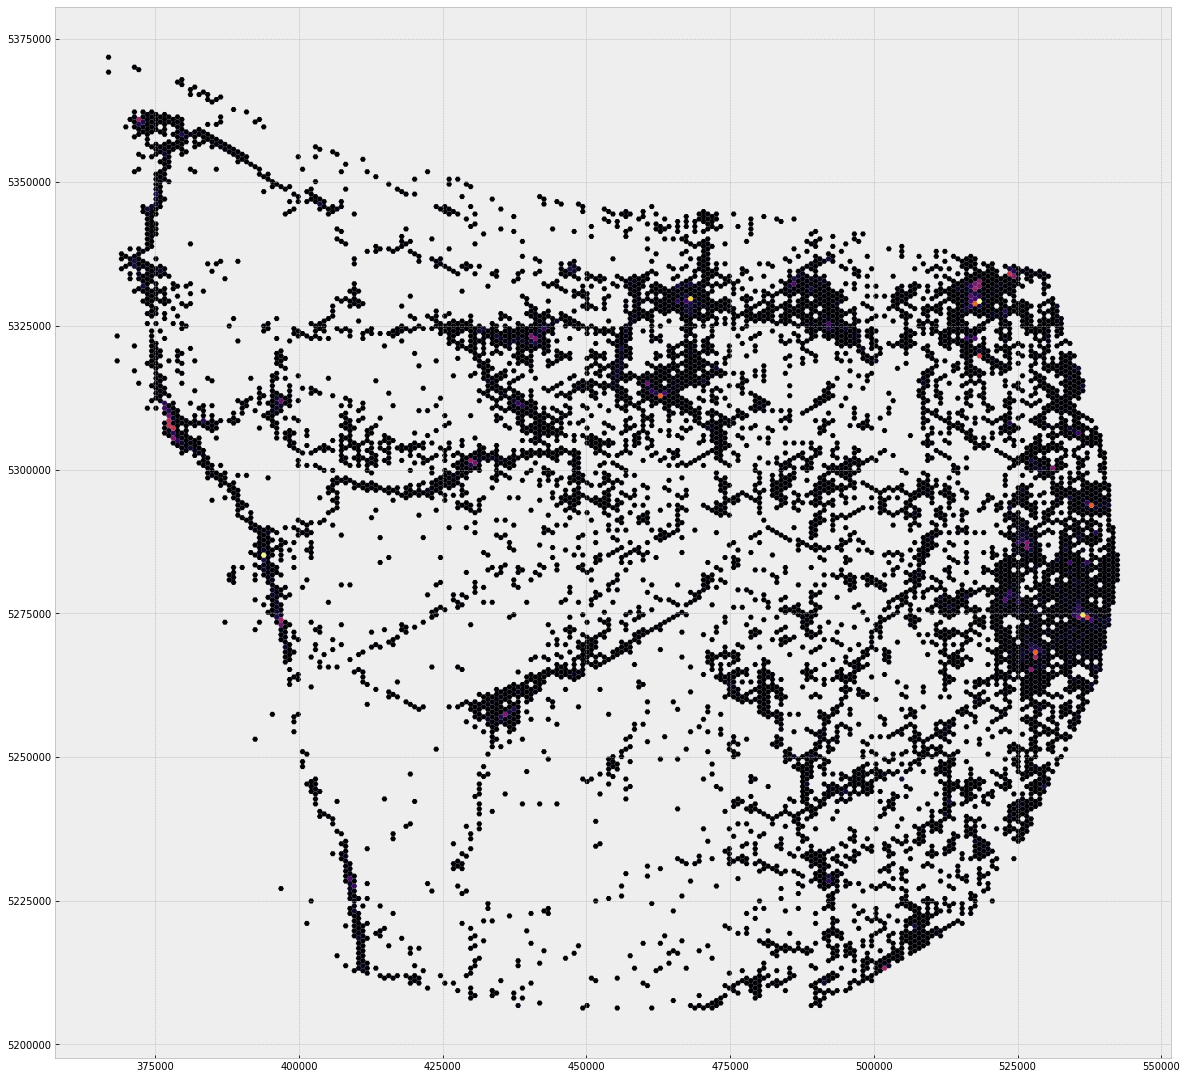

In [255]:
pud.plot(column = 'PUD_YR_AVG', cmap='inferno', figsize =(20,20));

Ideas... chloropleuth plot, results. log transformation on entire dataset to balance the data, omit columns that are not giving good information, maybe some form of regularization.
PCA, dimensionality reduction.
Binary, where a certain criteria returns a one otherwise a zero to reduce the sparsity in the data. 


#np.log(trails)


In [256]:
#pud.plot(column = 'zscore_PUD_YR_AVG', 

multi-temporal animation, and the 25 most popular trails. 
matplotlib.pyplot plt

setting out the layout for 25 panels.

Seasonal fluctuations, make a map for each individual column. 
Do we want to distribution of the dataset or the individual columns. 
Given count data, we want to find the proportion of the sample divided by the sum of all the PUD's in the park.  


In [273]:

def find_proportion(gdf, column):
    """Here we want to take the sum of the yearly average. and divide each entry by this value. 
    Parameters: gdf = geopandas dataframe
                column = column of interest located within the gdf geopandas dataframe.
    gdf[column + proportion_sum] = a specific gdf column  / sum(gdf with a specific column) 
        """
    gdf[column + 'proportion_sum'] = gdf[column] / np.sum(gdf[column]) 
    assert gdf[column].shape == gdf[column + "proportion_sum"].shape
    return gdf[column + 'proportion_sum']

pud.head()
print((pud['PUD_YR_AVG'].shape) == (find_proportion(pud,'PUD_YR_AVG').shape))

True


/Users/markconrad/anaconda/envs/GIS/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [288]:



def pudMap(file,column):
    """ Reads the shape file and from the list of file names selects the specified file to make a plot
        we may also want to apply the normalizing functions we defined earlier where the default is the annual
        average.
    """
    # make a geopandas dataframe. 
    shp = gpd.read_file(file)
    shp = remove_zeros(shp)
    find_proportion(shp, column)
    plot = shp.plot( column = column + 'proportion_sum',cmap = 'inferno', figsize= (20,20), legend = True)
    return plot
list(pud)

[u'FID',
 u'PUD_YR_AVG',
 u'PUD_JAN',
 u'PUD_FEB',
 u'PUD_MAR',
 u'PUD_APR',
 u'PUD_MAY',
 u'PUD_JUN',
 u'PUD_JUL',
 u'PUD_AUG',
 u'PUD_SEP',
 u'PUD_OCT',
 u'PUD_NOV',
 u'PUD_DEC',
 'geometry',
 'zscore_PUD_APR',
 'PUD_YR_AVGproportion_sum']

In [289]:
# Here we create a new column. 
#find_proportion(gdf_trails,'PUD_YR_AVG')
#gdf_trails.plot(column = 'PUD_YR_AVGproportion_sum', cmap='inferno', figsize =(20,20)); # very pretty graph that I don't really understand. 

In [290]:

# data.iloc[1] returns the first row of a dataframe whereas data.iloc[:,0]

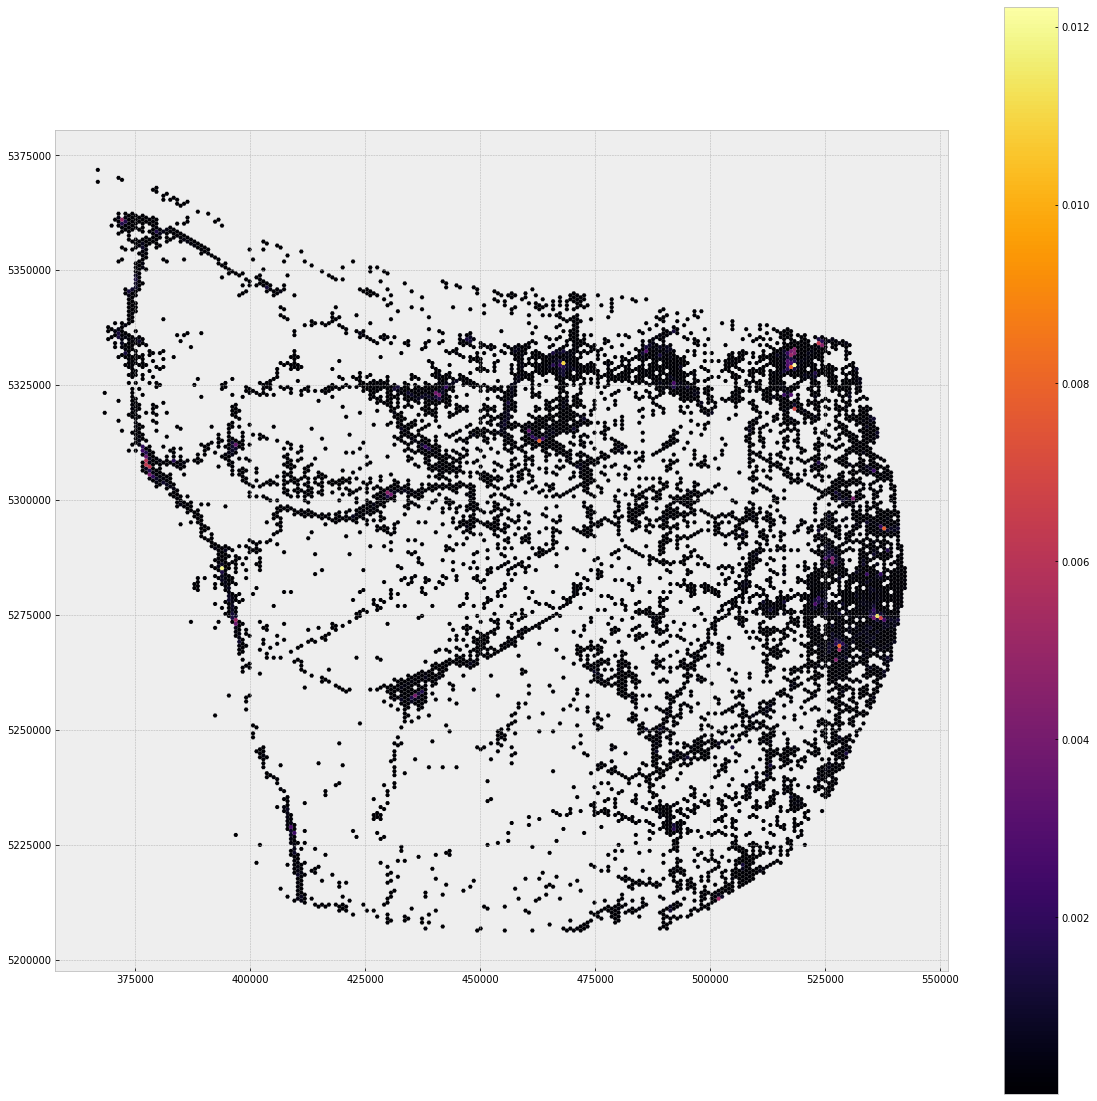

In [291]:
pudMap('pud_results_hex.shp', 'PUD_YR_AVG')

In [292]:
pud.columns[2]

u'PUD_JAN'

In [293]:
# Here we are iterating through the five of the most trafficked national park shape files, 
# passing a argument where the file directory is accessed and we read in each shape file iteratively and plot it
# here we want to make sure that each plot is has the same scale of units that it is measured by.
# we will use the proportions.
# file1 = shape file 1 ... file5 = shape file 5
# pudMap(file1,pud, 'PUD_YR_AVG' )

In [294]:
pud.columns[1] 



u'PUD_YR_AVG'

In [302]:
# When the files are pushed up we can access, from this we will create a for loop to automate the process of creating plots 
# for each shape file:
list_files = os.listdir('/Users/markconrad/Documents/GeoHack Week/SocialMediaTrails/SocialMediaTrails/data')

def make_plot(directory):
    for i in range(0,len(list(directory))):
        print(directory)
        if ".shp" in list(directory)[i]:
            pudMap(list(directory)[i],'PUD_YR_AVG')
        else: break
        
make_plot(list_files)

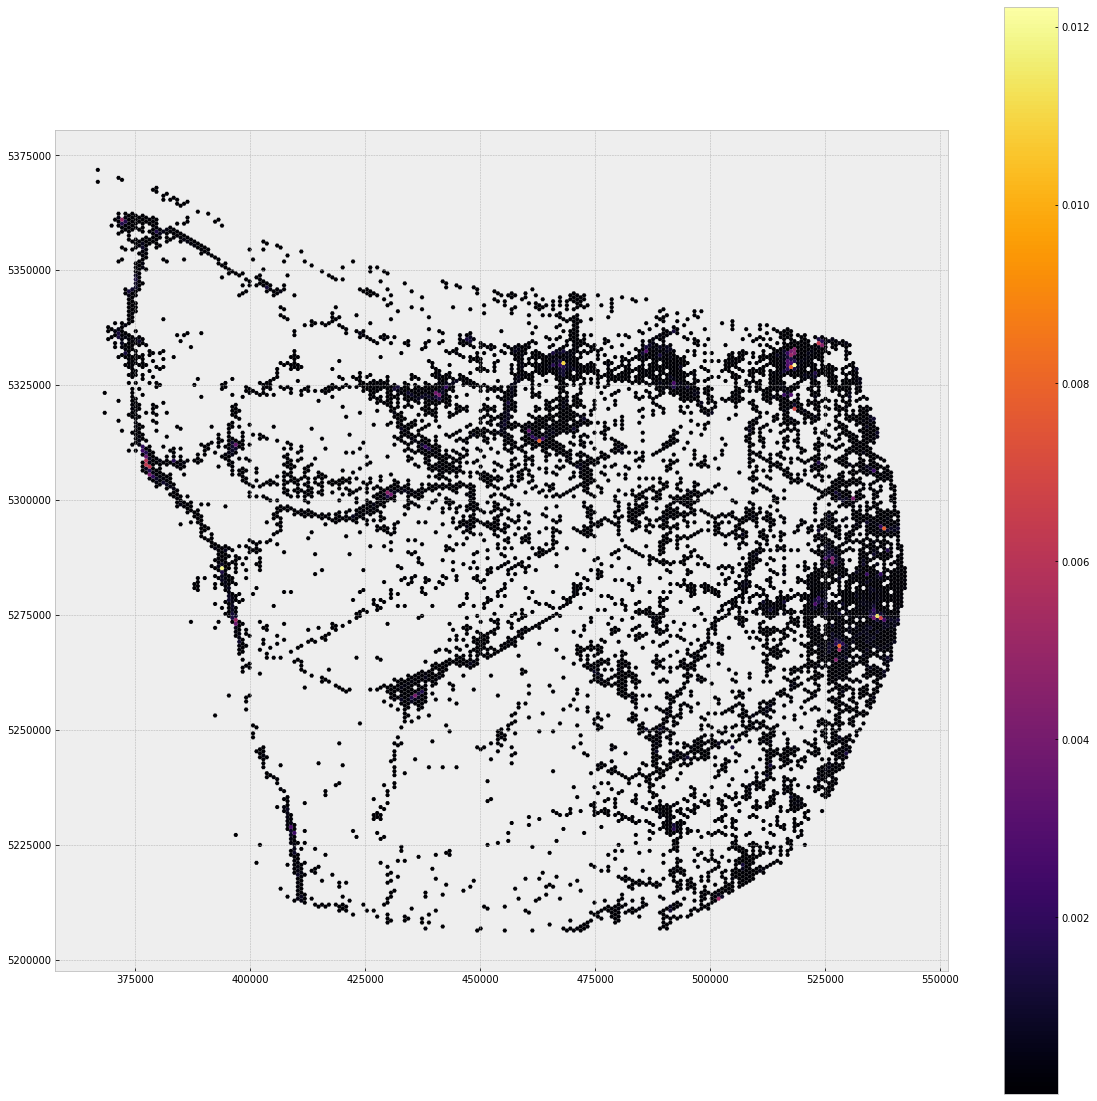

In [296]:

pudMap(list(list_files)[2],'PUD_YR_AVG')

In [297]:
len(list(list_files))

22

In [298]:
list(list_files)[0]

'.ipynb_checkpoints'

In [299]:
list(list_files)

['.ipynb_checkpoints',
 'FirstLook.py',
 'pud_results_hex.dbf',
 'pud_results_hex.prj',
 'pud_results_hex.qpj',
 'pud_results_hex.shp',
 'pud_results_hex.shx',
 'pud_results_rainier.dbf',
 'pud_results_rainier.prj',
 'pud_results_rainier.shp',
 'pud_results_rainier.shx',
 'rainier_trails.cpg',
 'rainier_trails.dbf',
 'rainier_trails.prj',
 'rainier_trails.shp',
 'rainier_trails.shx',
 'rainierNP_boundary.dbf',
 'rainierNP_boundary.prj',
 'rainierNP_boundary.qpj',
 'rainierNP_boundary.shp',
 'rainierNP_boundary.shx',
 'Untitled.ipynb']

In [300]:
make_plot(list_files)

In [301]:
make_plot(list_files)